In [2]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

# Домашнее задание по курсу анализа данных
Версия от 12.10.2021

Всего 50 баллов = 40 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 30.10.2021  23:59**

**Жесткий дедлайн: 6.11.2021  23:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

In [7]:
# Что-то обновлённый 02.11.21 csv-файл не хотел читаться

df = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv')
print('Размеры',df.shape)
df.head()

Размеры (6000, 10)


,id,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
0,0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579


In [6]:
# Поптыка отбросить плохие строки ни к чему не привела

df = pd.read_csv('https://github.com/a-milenkin/mipt_data_science_2021/tree/main/data/people_data_clustering.csv', header=0, index_col=0, error_bad_lines=False)
print('Размеры',df.shape)
df.head()

Размеры (78978, 0)


b'Skipping line 120: expected 1 fields, saw 2\nSkipping line 139: expected 1 fields, saw 355\nSkipping line 140: expected 1 fields, saw 2\nSkipping line 155: expected 1 fields, saw 2\nSkipping line 208: expected 1 fields, saw 3\nSkipping line 222: expected 1 fields, saw 6\nSkipping line 259: expected 1 fields, saw 4\nSkipping line 263: expected 1 fields, saw 2\nSkipping line 280: expected 1 fields, saw 2\nSkipping line 281: expected 1 fields, saw 2\nSkipping line 287: expected 1 fields, saw 2\nSkipping line 290: expected 1 fields, saw 2\nSkipping line 298: expected 1 fields, saw 4\nSkipping line 304: expected 1 fields, saw 2\nSkipping line 309: expected 1 fields, saw 2\nSkipping line 310: expected 1 fields, saw 2\nSkipping line 311: expected 1 fields, saw 2\nSkipping line 312: expected 1 fields, saw 2\nSkipping line 313: expected 1 fields, saw 2\nSkipping line 319: expected 1 fields, saw 2\nSkipping line 320: expected 1 fields, saw 2\nSkipping line 321: expected 1 fields, saw 2\nSkippi

""
<!DOCTYPE html>
"<html lang=""en"" data-color-mode=""auto"" data-light-theme=""light"" data-dark-theme=""dark"">"
<head>
"<meta charset=""utf-8"">"
"<link rel=""dns-prefetch"" href=""https://github.githubassets.com"">"
"<link rel=""dns-prefetch"" href=""https://avatars.githubusercontent.com"">"


In [7]:
from google.colab import files
uploaded = files.upload()

Saving people_data_clustering_(old_one).csv to people_data_clustering_(old_one).csv


In [8]:
# Пришлось взять "старую" версию датасета у одногруппника

df = pd.read_csv('people_data_clustering_(old_one).csv', index_col=0)
print('Размеры',df.shape)
df.head()

Размеры (6000, 9)


,id,was_married,childrens,salary,sex,age,profession,home_cost,drive_info
0,0,1,4.0,45032.40,1,82.0,Engineer,1.003674e+07,NaN
1,1,1,2.0,202004.64,1,32.0,Doctor,1.014051e+07,0.0
2,2,1,6.0,213158.75,1,14.0,Entertainment,1.043318e+07,NaN
3,3,0,1.0,185692.78,0,10.0,Lawyer,1.004299e+07,NaN
4,4,1,9.0,132067.32,1,99.0,Artist,1.021908e+07,NaN


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `childrens` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол
* `age` - Возраст
* `home_cost` - Стоимость жилья
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.



---



---



# Изучение датасета (5 баллов)
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки бинарные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

In [9]:
print(df.dtypes)

id               int64
was_married      int64
childrens      float64
salary         float64
sex              int64
age            float64
profession      object
home_cost      float64
drive_info     float64
dtype: object


###Делаем вывод, что
* *численные признаки:* childrens, salary, age, home_cost
* *категориальные признаки:* profession
* *бинарные признаки:* was_married, sex, driver_info


---



###Проверим теперь численные признаки на нормальность:

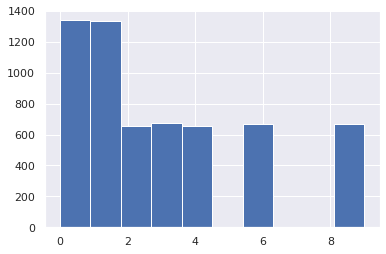

In [10]:
df['childrens'].hist()

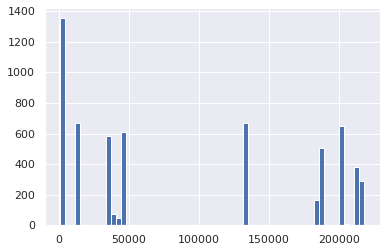

In [11]:
df['salary'].hist(bins=60)

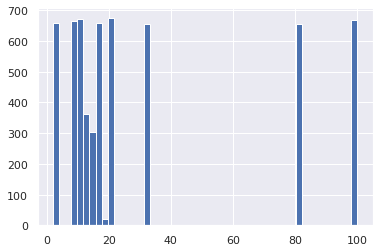

In [12]:
df['age'].hist(bins=50)

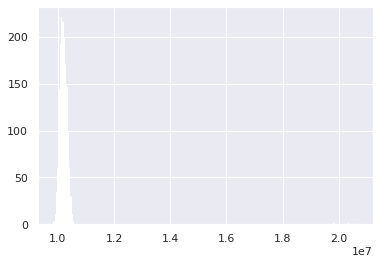

In [13]:
df['home_cost'].hist(bins=1000)

In [14]:
df['home_cost'].max()

20657915.51438855

In [15]:
df['home_cost'].mean()

10191838.633263767

###Вывод:
*Похоже, нормальное распределение имеет только* ***home_cost***


---



###Бессмысленные признаки:
Как мы увидим дальше, информация о наличии водительских прав отсутсвует у половины записей. В таком случае, если удалять половину строк из датасета, распределение стоимости домов может серьёзно измениться и скорее всего уже не будет нормальным. Кроме того, мы не знаем, откуда были взяты данные и по какой причине в некоторых отсутвует какая-либо информация. Может случиться, что, удалив эти строки, мы потеряем какую-то важную группу объектов. Да и сама мысль удаления половины датасета выглядит смущающей. Поэтому правильным кажется вариент удаления столбца ***drive_info***



---



---




# Чистка датасета (5 баллов)
* Есть ли дубли в данных? 
* Есть ли пропуски в данных? 
* Как стоит поступить с выбросами? (удалить или заменить \ `dropna()` или `fillna()` )
* Удалить бесмысленные признаки (`drop()`)
* Найти и удалить выбросы по признаку `home_cost`. Сколько их?

In [16]:
df.loc[df.duplicated()]

,id,was_married,childrens,salary,sex,age,profession,home_cost,drive_info
5500,0,1,4.0,45032.40,1,82.0,Engineer,1.003674e+07,NaN
5501,1,1,2.0,202004.64,1,32.0,Doctor,1.014051e+07,0.0
5502,2,1,6.0,213158.75,1,14.0,Entertainment,1.043318e+07,NaN
5503,3,0,1.0,185692.78,0,10.0,Lawyer,1.004299e+07,NaN
5504,4,1,9.0,132067.32,1,99.0,Artist,1.021908e+07,NaN
...,...,...,...,...,...,...,...,...,...
5995,495,1,0.0,37023.38,1,3.0,Executive,1.007038e+07,1.0
5996,496,1,3.0,999.66,0,20.0,Homemaker,1.009348e+07,1.0
5997,497,1,0.0,2042.76,0,17.0,Healthcare,1.016696e+07,0.0
5998,498,0,1.0,186560.45,0,10.0,Lawyer,1.025544e+07,NaN


In [45]:
df = df.drop_duplicates()

In [46]:
df

,id,was_married,childrens,salary,sex,age,profession,home_cost,drive_info
0,0,1,4.0,45032.40,1,82.0,Engineer,1.003674e+07,NaN
1,1,1,2.0,202004.64,1,32.0,Doctor,1.014051e+07,0.0
2,2,1,6.0,213158.75,1,14.0,Entertainment,1.043318e+07,NaN
3,3,0,1.0,185692.78,0,10.0,Lawyer,1.004299e+07,NaN
4,4,1,9.0,132067.32,1,99.0,Artist,1.021908e+07,NaN
...,...,...,...,...,...,...,...,...,...
5495,5495,1,1.0,12676.77,1,9.0,Marketing,1.027045e+07,0.0
5496,5496,1,6.0,215570.69,1,13.0,Entertainment,1.032767e+07,1.0
5497,5497,1,0.0,34734.29,1,3.0,Executive,1.010075e+07,NaN
5498,5498,1,1.0,12667.06,1,9.0,Marketing,1.011321e+07,1.0


## Вывод:
В датасете присуствовало ровно 500 дупликатов строк

---



In [47]:
df.isnull().sum()

id                0
was_married       0
childrens         0
salary            0
sex               0
age               0
profession        0
home_cost         0
drive_info     2524
dtype: int64

Видно, что примерно половина строк имеет пропуски в поле **drive_info**

---

Если посчитать информацию о наличии прав существенной, то заполнить пропуски сами мы не можем, а если считать её не существенной, то можно смело удалять этот столбец (он будет удалён чуть ниже).

---


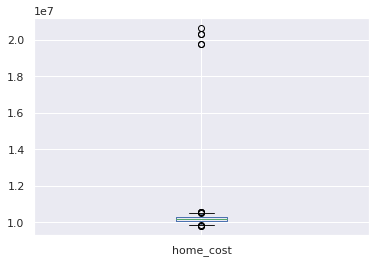

In [48]:
bp = df.home_cost.plot.box()
#plt.boxplot(df['home_cost']);

In [61]:
ql = df['home_cost'].quantile(0.05)
qu = df['home_cost'].quantile(0.95)
q1 = df['home_cost'].quantile(0.25)
q3 = df['home_cost'].quantile(0.75)
iqr = q3 - q1
df[(df['home_cost'] < q1-1.5*iqr ) | (df['home_cost'] > q3+1.5*iqr)]['home_cost']

173     9.824378e+06
714     1.054213e+07
1140    2.032128e+07
1779    2.031197e+07
1825    1.054779e+07
2070    9.824841e+06
2966    1.053073e+07
3307    1.979488e+07
3380    1.979532e+07
3912    1.054311e+07
4014    9.827240e+06
4727    2.065792e+07
Name: home_cost, dtype: float64

In [62]:
df[(df['home_cost'] < q1-1.5*iqr ) | (df['home_cost'] > q3+1.5*iqr)]['home_cost'].count()

12

###Вывод:
Имеем 12 выбросов

In [71]:
df1 = df[(df['home_cost'] >= q1-1.5*iqr) & (df['home_cost'] <= q3+1.5*iqr)]

In [72]:
df1.shape

(5488, 9)

In [74]:
df1 = df.dropna(axis=1)
df1.shape

(5500, 8)



---



---



# Изучение зависимых признаков (5 балла). 
* Построить матрицу корреляций
* Визуализировать матрицу корреляции с помощью heatmap
* Сделать выводы по самым скоррелированные признакам
* Построить график зависимости между двумя самыми зависимыми признаками



In [79]:
df2 = df1.drop(columns=['id'])
cm = df2.corr()
print(cm)

             was_married  childrens    salary       sex       age  home_cost
was_married     1.000000   0.242439 -0.500360  0.337564  0.200417  -0.113610
childrens       0.242439   1.000000  0.393879  0.385415  0.742417   0.092056
salary         -0.500360   0.393879  1.000000  0.244868  0.076125   0.238794
sex             0.337564   0.385415  0.244868  1.000000  0.340071   0.074349
age             0.200417   0.742417  0.076125  0.340071  1.000000   0.013346
home_cost      -0.113610   0.092056  0.238794  0.074349  0.013346   1.000000


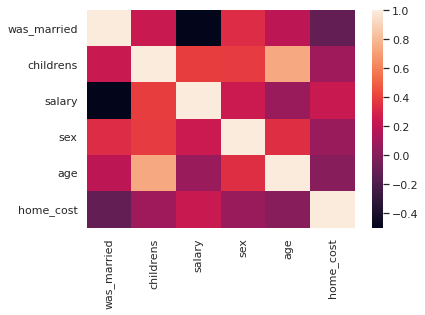

In [80]:
ax = sns.heatmap(cm)

* Как видно, самыми скоррелированными признаками являются "возраст" и "количество детей", что логично.
* Следом за этой парой идёт пара "зарплата" и "состял(-а) в браке". В среднем, возраст людей, состоявших когда-либо в браке, должен быть выше возраста тех, кто никогда не состоял. По этой причине они должны иметь уже более развитую карьеру и, как следствие, более высокую зарплату. Ну и кроме того, брак, по идее, должен мотивировать людей к поиску путей получения более высокой заработной платы. В этом смысле, результаты кажутся логичными.

---



---



# Нормировка признаков (3 балла)
* Отнормировать данные
* Обосновать выбор нормировки

Выбросы мы удалили, так что RobustScaler не стоит использовать. Кроме того, все количественные признаки имеют положительные значения, поэтому я не вижу причин не использовать MinMaxScaler.



In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 

scaler = MinMaxScaler()
normal_data = 

# Выделить кластеры (6 баллов)
* Определить оптимальное количество кластеров с помощью правила локтя/осыпи
* Получить номера класстеров для каждого пользователя. 

In [ ]:
# Вспомогательные код

# from sklearn.cluster import KMeans

# clusterer = KMeans(n_clusters=n_clusters, random_state=42, max_iter=500)
# cluster_labels = clusterer.fit_predict(data)

# Снизить разерность (6 баллов)

Воспользуйтесь методом `t-SNE ()` (или `PCA`, `U-MAP`)

ссылка на документацию:
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [ ]:
# Вспомогательные код

# from sklearn.manifold import TSNE

# data_x_y = TSNE(n_components=2, learning_rate='auto',
#                 random_state=22, n_jobs=-1, 
#                 init='random').fit_transform(df)

# Нарисовать полученные кластеры (10 баллов)

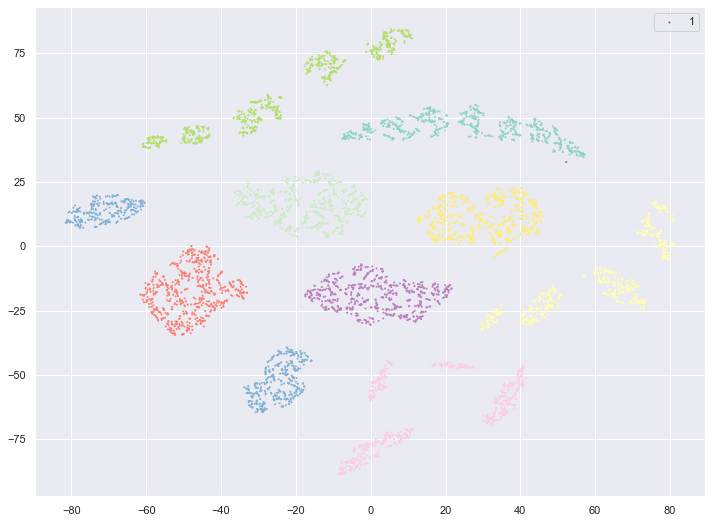

In [ ]:
# Вспомогательные код

# import matplotlib.pyplot as plt

# plt.figure(figsize=(12,9))
# plt.scatter(data_x, data_y, c=cluster_labels, cmap ='Set3', s=5)
# plt.scatter(data_x, data_y, c=y_blobs, s=1, cmap ='Set3')
# # plt.legend(cluster_labels)
# plt.show()

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**